# Tutorial in the Use of libRadtran

libRadtran is a collection of tools for computational radiative transfer in the Earth atmosphere. 
This tutorial only shows the reading of uvspec input files and the reading of uvspec output files, as well as plotting of some outputs.

In order to run uvspec cases, a working installation of libRadtran is required, which is generally only possible on unix/linux machines.

Here it is shown how to read, modify and write libRadtran/uvspec input files, as well as reading of libRadtran/uvspec output files, together with plotting of some results.

For downloads and further information, go to http://www.libradtran.org


In [4]:
import morticia.rad.librad as librad
# Use auto reload of librad for development purposes
%load_ext autoreload
%autoreload 1
%aimport morticia.rad.librad
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# use latex for font rendering
mpl.rcParams['text.usetex'] = True  # Use TeX to format labels (takes a bit longer)
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Load a libRadtran example case
# Be default, any include files are expanded, creating a single set of option keywords
libRadCase=librad.Case(filename='./examples/UVSPEC_AEROSOL.INP')

In [7]:
# The printed version is identical to what is written in the libRadtran/uvspec input file
print libRadCase

atmosphere_file ../data/atmmod/afglus.dat
source solar ../data/solar_flux/atlas_plus_modtran
mol_modify O3 300. DU
day_of_year 170
albedo 0.2
sza 32.0
rte_solver disort
number_of_streams 6
wavelength 299.0 341.0
slit_function_file ../examples/TRI_SLIT.DAT
spline 300 340 1
quiet 
aerosol_vulcan 1
aerosol_haze 6
aerosol_season 1
aerosol_visibility 20.0
aerosol_angstrom 1.1 0.2
aerosol_modify ssa scale 0.85
aerosol_modify gg set 0.70
aerosol_file tau ../examples/AERO_TAU.DAT


In [8]:
libRadCase.readout()  # Read uvspec output data for this case

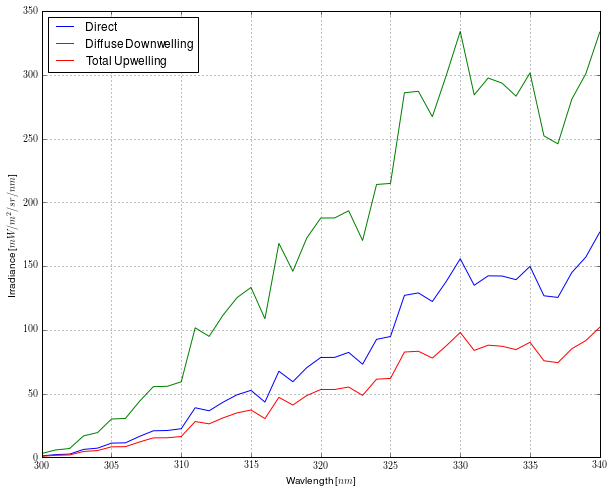

In [9]:
plt.figure(figsize=(10,8))
plt.plot(libRadCase.wvl, libRadCase.edir, libRadCase.wvl, libRadCase.edn, libRadCase.wvl, libRadCase.eup)
plt.xlabel('Wavlength [$nm$]')
plt.ylabel('Irradiance [$mW/m^2/sr/nm$]')
plt.legend(['Direct','Diffuse Downwelling','Total Upwelling'], loc='upper left')
plt.grid()

In [10]:
# Thermal two-stream fast irradiances using the RODENTS solver
libRadCase=librad.Case(filename='examples/UVSPEC_RODENTS_ZOUT_THERMAL.INP')

In [11]:
libRadCase.readout()

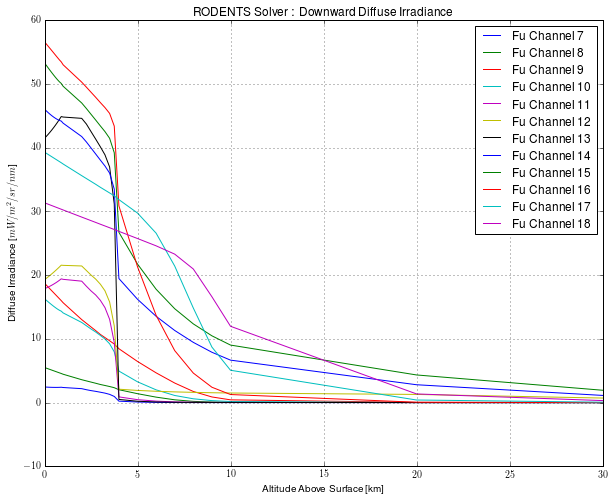

In [12]:
plt.figure(figsize=(10,8))
plt.plot(libRadCase.zout, libRadCase.edn)
plt.title('RODENTS Solver : Downward Diffuse Irradiance')
plt.xlabel('Altitude Above Surface [km]')
plt.ylabel('Diffuse Irradiance [$mW/m^2/sr/nm$]')
plt.legend(['Fu Channel ' + str(chan) for chan in range(7,19)])
plt.xlim([0,30])
plt.grid()

In [13]:
# Lidar solver example
# The lidar is at an altitude of 8.55 km, looking straight down
# Ground albedo is 0.2, causing sudden increase in returned signal at that range
# There is a cloud layer betweeen 2 and 4 km above ground
ss=librad.Case(filename='examples/UVSPEC_SSLIDAR.INP')

In [14]:
ss.readout()  # Read the uvspec output

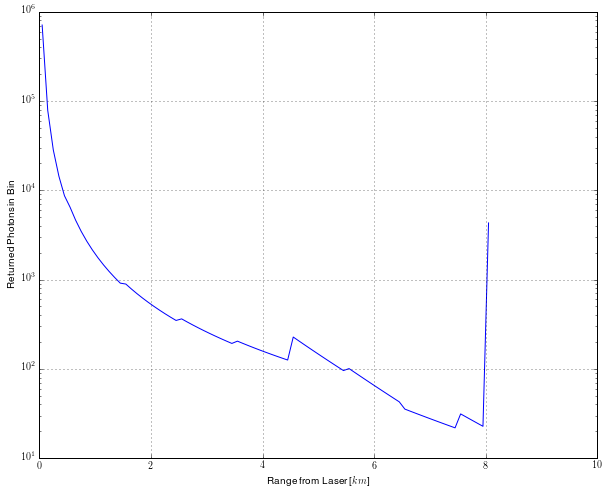

In [15]:
plt.figure(figsize=(10,8))
plt.semilogy(ss.center_of_range, ss.number_of_photons)
plt.xlabel('Range from Laser [$km$]')
plt.ylabel('Returned Photons in Bin')
plt.grid()


In [16]:
# This case shows use of the RPV (Rahman, Pinty, Verstraete [1993]) BRDF for a "plowed field"
# The wavelength is 400 nm (only)
x = librad.Case(filename='examples/UVSPEC_BRDF.INP')

In [17]:
x.readout()

In [18]:
x.uu.shape

(34L, 3L)

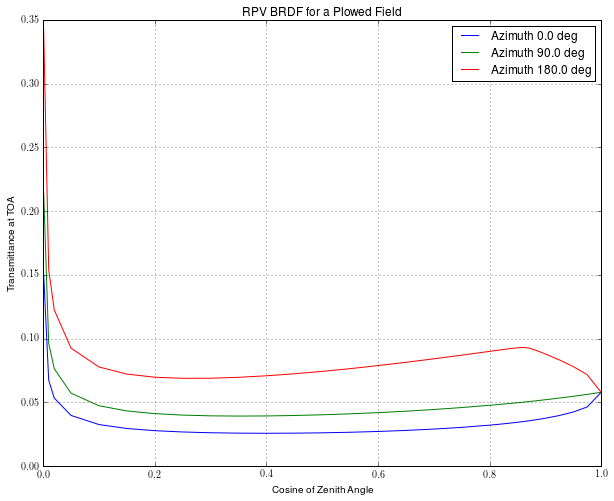

In [24]:
plt.figure(figsize=(10, 8))
plt.title('RPV BRDF for a Plowed Field')
plt.plot(x.umu, x.uu[:,:])  # Variable order is umu, phi, wvl, zout, nstokes
plt.xlabel('Cosine of Zenith Angle')
plt.ylabel('Transmittance at TOA')
plt.legend(['Azimuth ' + str(phi) + ' deg' for phi in x.phi])
plt.grid()

In [19]:
# Here is a case with radiances in both umu and phi
y = librad.Case(filename='examples/UVSPEC_RADIANCES_ZOUT.INP')

In [20]:
y.readout()

In [21]:
print y.n_umu, y.n_phi, y.n_wvl, y.n_zout
print y.u0u.shape
y.u0u[:,1,0]

4 7 41 2
(4L, 41L, 2L)


array([ 2.07375002,  1.58635032,  1.1694181 ,  1.0313766 ])

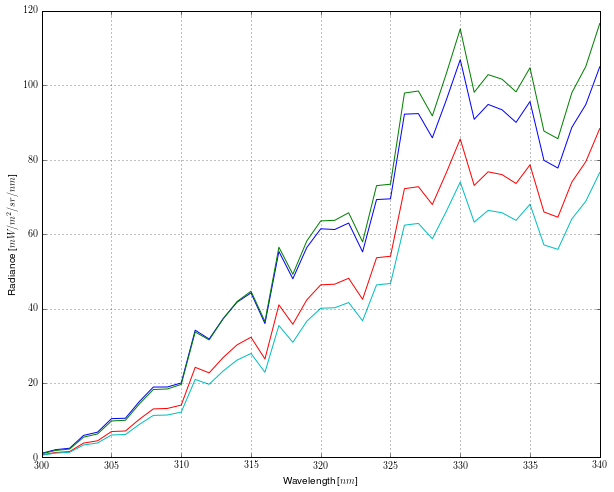

In [22]:
# Plot radiances 
plt.figure(figsize=(10, 8), )
for iumu in range(y.n_umu):
    plt.plot(y.wvl, y.uu[iumu,0,:,0])  # order is umu, phi, wvl, zout, stokes
plt.xlabel('Wavelength [$nm$]')
plt.ylabel('Radiance [$mW/m^2/sr/nm$]')
plt.grid()

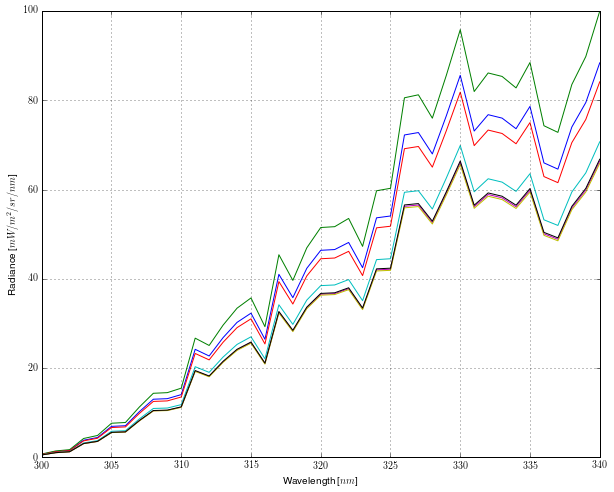

In [23]:
plt.figure(figsize=(10, 8))
for iphi in range(y.n_phi):
    plt.plot(y.wvl, y.uu[2,iphi,:,1]) # order is umu, phi, wvl, zout, stokes
plt.xlabel('Wavelength [$nm$]')
plt.ylabel('Radiance [$mW/m^2/sr/nm$]')
plt.grid()

In [24]:
# Solar irradiance profiles with old LOWTRAN model (fast, but not very accurate)
z = librad.Case(filename='examples/UVSPEC_PROFILES4.INP')

In [25]:
z.readout()

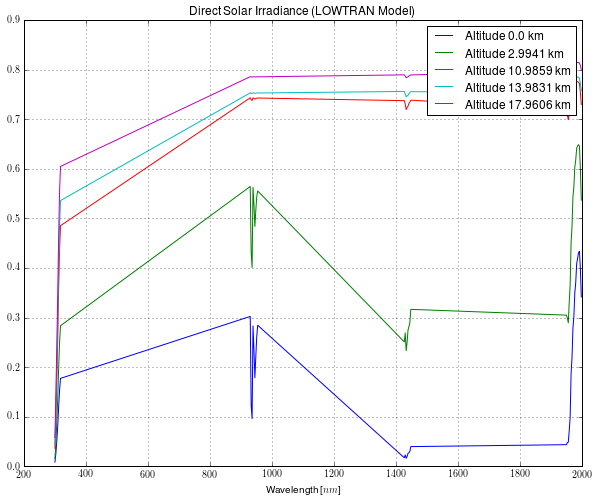

In [26]:
plt.figure(figsize=(10, 8))
plt.plot(z.wvl, z.edir.T)
plt.title('Direct Solar Irradiance (LOWTRAN Model)')
plt.legend(['Altitude ' + str(zout) + ' km' for zout in z.zout])
plt.xlabel('Wavelength [$nm$]')
plt.grid()

In [27]:
# Two-stream irradiances using the fine spectral resolution REPTRAN model
lRep = librad.Case(filename='examples/UVSPEC_REPTRAN_SOLAR.INP')

In [28]:
lRep.readout()

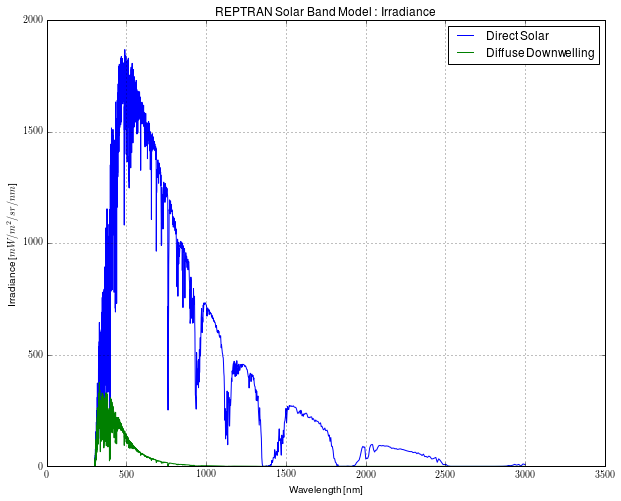

In [29]:
plt.figure(figsize=(10,8))
plt.plot(lRep.wvl, lRep.edir, lRep.wvl, lRep.edn)
plt.title('REPTRAN Solar Band Model : Irradiance')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Irradiance [$mW/m^2/sr/nm$]')
plt.legend(['Direct Solar', 'Diffuse Downwelling'])
plt.grid()

In [30]:
z = librad.Case(filename='examples/UVSPEC_RADIANCES_ZOUT.INP')

In [31]:
z.readout()

In [32]:
k = librad.Case(filename='examples/UVSPEC_REPTRAN_THERMAL.INP')


In [33]:
k.readout()

In [34]:
k.output_quantity

'brightness'

In [35]:
c = librad.Case(filename='examples/UVSPEC_FILTER_SOLAR.INP')

In [36]:
c

data_files_path ../data/
rte_solver disort
source solar ../data/solar_flux/kurudz_0.1nm.dat per_nm
albedo 0
filter_function_file ../data/filter/msg/msg1_seviri_ch006 
wavelength 485 785
output_process integrate
zout TOA
umu 0.5 1.0
quiet 

In [37]:
c.readout()

In [38]:
c.rad_units

['mW', 'm^2', 'nm']

In [39]:
p = librad.Case(filename='examples/UVSPEC_AEROSOL_OPAC_POLaZOUT.INP')

In [40]:
p.readout()

In [41]:
b = librad.Case(filename='examples/UVSPEC_MC.INP')

Warning, keyword option mc_sample_grid not found in options library.
Warning, keyword option mc_elevation_file not found in options library.
Warning, keyword option mc_albedo_file not found in options library.


In [42]:
b.readout()

In [43]:
b.fluxline

['wvl', 'edir', 'edn', 'eup', 'uavgdir', 'uavgdn', 'uavgup']

In [44]:
b.edir, b.edn, b.eup, b.uavgdir, b.uavgdn, b.uavgup


(array(19.14825),
 array(54.19458),
 array(37.80135),
 array(1.796795),
 array(8.60454),
 array(6.060847))

In [45]:
b.wvl

array([ 310.])

In [275]:
# Reproduce the sunglint case plot for the Sentinel 3 OLCI band 13
sung = librad.Case(filename='examples/GUI/radiance_sentinel_sunglint/radiance_sentinel_sunglint.INP')

In [276]:
sung.readout()

In [277]:
sung

atmosphere_file ../data/atmmod/afglus.dat
rte_solver disort
source solar
mol_abs_param reptran_channel sentinel3_olci_b13
quiet 
zout TOA
umu 0.0174524 0.0348995 0.0523360 0.0697565 0.0871557 0.1045285 0.1218693 0.1391731 0.1564345 0.1736482 0.1908090 0.2079117 0.2249511 0.2419219 0.2588190 0.2756374 0.2923717 0.3090170 0.3255682 0.3420201 0.3583679 0.3746066 0.3907311 0.4067366 0.4226183 0.4383711 0.4539905 0.4694716 0.4848096 0.5000000 0.5150381 0.5299193 0.5446390 0.5591929 0.5735764 0.5877853 0.6018150 0.6156615 0.6293204 0.6427876 0.6560590 0.6691306 0.6819984 0.6946584 0.7071068 0.7193398 0.7313537 0.7431448 0.7547096 0.7660444 0.7771460 0.7880108 0.7986355 0.8090170 0.8191520 0.8290376 0.8386706 0.8480481 0.8571673 0.8660254 0.8746197 0.8829476 0.8910065 0.8987940 0.9063078 0.9135455 0.9205049 0.9271839 0.9335804 0.9396926 0.9455186 0.9510565 0.9563048 0.9612617 0.9659258 0.9702957 0.9743701 0.9781476 0.9816272 0.9848078 0.9876883 0.9902681 0.9925462 0.9945219 0.9961947 0.997564

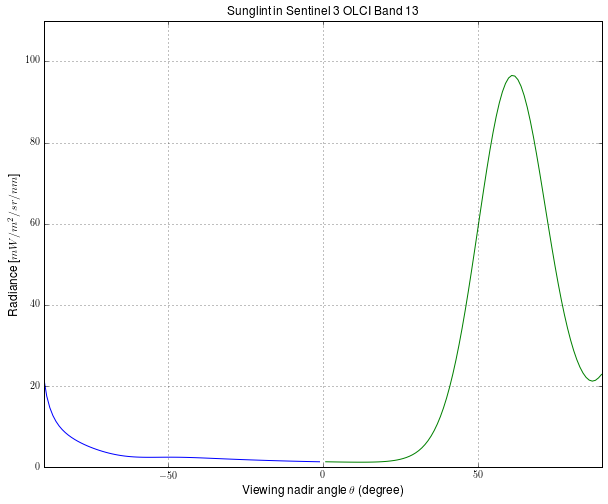

In [278]:
plt.figure(figsize=(10,8))
plt.plot(np.rad2deg(np.arcsin(-sung.umu[::-1])), sung.uu[1::2],
         np.rad2deg(np.arcsin(sung.umu)), sung.uu[-2::-2])
plt.xlim([-90,90])
plt.ylim([0,110])
plt.title('Sunglint in Sentinel 3 OLCI Band 13')
plt.ylabel(r"Radiance [$mW/m^2/sr/nm$]", fontsize = 12)
plt.xlabel(r"Viewing nadir angle $\theta$ (degree)", fontsize = 12)
plt.grid()

In [85]:
sung

atmosphere_file ../data/atmmod/afglus.dat
rte_solver disort
source solar
mol_abs_param reptran_channel sentinel3_olci_b13
quiet 
zout TOA
umu 0.0174524 0.0348995 0.0523360 0.0697565 0.0871557 0.1045285 0.1218693 0.1391731 0.1564345 0.1736482 0.1908090 0.2079117 0.2249511 0.2419219 0.2588190 0.2756374 0.2923717 0.3090170 0.3255682 0.3420201 0.3583679 0.3746066 0.3907311 0.4067366 0.4226183 0.4383711 0.4539905 0.4694716 0.4848096 0.5000000 0.5150381 0.5299193 0.5446390 0.5591929 0.5735764 0.5877853 0.6018150 0.6156615 0.6293204 0.6427876 0.6560590 0.6691306 0.6819984 0.6946584 0.7071068 0.7193398 0.7313537 0.7431448 0.7547096 0.7660444 0.7771460 0.7880108 0.7986355 0.8090170 0.8191520 0.8290376 0.8386706 0.8480481 0.8571673 0.8660254 0.8746197 0.8829476 0.8910065 0.8987940 0.9063078 0.9135455 0.9205049 0.9271839 0.9335804 0.9396926 0.9455186 0.9510565 0.9563048 0.9612617 0.9659258 0.9702957 0.9743701 0.9781476 0.9816272 0.9848078 0.9876883 0.9902681 0.9925462 0.9945219 0.9961947 0.997564

In [324]:
asung = librad.RadEnv(sung, 256,256, hemi=True)


In [328]:
asung.vza

<xray.DataArray 'vza' (vza: 256)>
array([   0.        ,    0.70588235,    1.41176471,    2.11764706,
          2.82352941,    3.52941176,    4.23529412,    4.94117647,
          5.64705882,    6.35294118,    7.05882353,    7.76470588,
          8.47058824,    9.17647059,    9.88235294,   10.58823529,
         11.29411765,   12.        ,   12.70588235,   13.41176471,
         14.11764706,   14.82352941,   15.52941176,   16.23529412,
         16.94117647,   17.64705882,   18.35294118,   19.05882353,
         19.76470588,   20.47058824,   21.17647059,   21.88235294,
         22.58823529,   23.29411765,   24.        ,   24.70588235,
         25.41176471,   26.11764706,   26.82352941,   27.52941176,
         28.23529412,   28.94117647,   29.64705882,   30.35294118,
         31.05882353,   31.76470588,   32.47058824,   33.17647059,
         33.88235294,   34.58823529,   35.29411765,   36.        ,
         36.70588235,   37.41176471,   38.11764706,   38.82352941,
         39.52941176,   40.2

In [317]:
asung.cases[0][0]

atmosphere_file ../data/atmmod/afglus.dat
rte_solver disort
source solar
mol_abs_param reptran_channel sentinel3_olci_b13
quiet 
zout TOA
umu -1.0 -0.999924110115 -0.999696451978 -0.999317060143 -0.998785992194 -0.998103328737 -0.997269173386 -0.996283652748 -0.995146916407 -0.993859136895 -0.992420509672 -0.990831253092 -0.989091608371 -0.987201839554 -0.985162233468 -0.982973099684 -0.980634770469 -0.978147600734 -0.97551196798 -0.972728272245 -0.969796936035 -0.966718404269 -0.963493144206 -0.960121645375 -0.9566044195 -0.952942000427 -0.949134944036 -0.945183828161 -0.941089252501 -0.936851838531 -0.932472229404 -0.927951089857 -0.923289106105 -0.918486985746 -0.913545457643 -0.90846527182 -0.903247199346 -0.89789203222 -0.892400583248 -0.88677368592 -0.881012194286 -0.875116982823 -0.869088946306 -0.862928999667 -0.856638077864 -0.85021713573 -0.843667147834 -0.836989108332
phi 0.0 0.703125 1.40625 2.109375 2.8125 3.515625 4.21875 4.921875 5.625 6.328125 7.03125 7.734375 8.4375 9.

In [314]:
asung.cases[1][2].outfile

'D:\\Projects\\GitHub\\nbMORTICIA\\rad\\examples\\GUI\\radiance_sentinel_sunglint\\radiance_sentinel_sunglint_0001_0002.OUT'

In [135]:
sung

atmosphere_file ../data/atmmod/afglus.dat
rte_solver disort
source solar
mol_abs_param reptran_channel sentinel3_olci_b13
quiet 
zout TOA
umu 0.982973099684 0.985162233468 0.987201839554 0.989091608371 0.990831253092 0.992420509672 0.993859136895 0.995146916407 0.996283652748 0.997269173386 0.998103328737 0.998785992194 0.999317060143 0.999696451978 0.999924110115 1.0
phi 347.34375 348.75 350.15625 351.5625 352.96875 354.375 355.78125 357.1875 358.59375
output_user uu
sza 55
phi0 0
brdf_cam u10 3

In [160]:
import copy
a = copy.deepcopy(sung)

In [174]:
a

atmosphere_file ../data/atmmod/afglus.dat
rte_solver disort
source solar
mol_abs_param reptran_channel sentinel3_olci_b13
quiet 
zout TOA
umu 0.982973099684 0.985162233468 0.987201839554 0.989091608371 0.990831253092 0.992420509672 0.993859136895 0.995146916407 0.996283652748 0.997269173386 0.998103328737 0.998785992194 0.999317060143 0.999696451978 0.999924110115 1.0
phi 347.34375 348.75 350.15625 351.5625 352.96875 354.375 355.78125 357.1875 358.59375
output_user uu
sza 55
phi0 0
brdf_cam u10 3

In [215]:
b = 

In [216]:
b[0][0].infile = '+++++++++++.INP'

In [218]:
b[0][1].infile

'+++++++++++.INP'

In [281]:
class stubclass:
    def __init__(self, name):
        self.name = name

In [282]:
a = stubclass('startname')

In [283]:
a.name


'startname'

In [284]:
b = [[copy.deepcopy(a) for i in range(2)] for j in range(4)]

In [266]:
b[0][0].name = 'newname'

In [273]:
[[b[i][j].name for i in range(0,1)] for j in range(0,3)]

IndexError: list index out of range

In [289]:
b[3][1]

<__main__.stubclass instance at 0x000000001A7C4648>

In [290]:
b

[[<__main__.stubclass instance at 0x000000001A7C42C8>,
  <__main__.stubclass instance at 0x000000001A7C4548>],
 [<__main__.stubclass instance at 0x000000001A7C4348>,
  <__main__.stubclass instance at 0x000000001A7C4488>],
 [<__main__.stubclass instance at 0x000000001A7C4588>,
  <__main__.stubclass instance at 0x000000001A7C45C8>],
 [<__main__.stubclass instance at 0x000000001A7C4608>,
  <__main__.stubclass instance at 0x000000001A7C4648>]]